<h1>Load yours data</h1>

In [1]:
# -- Import --
import pandas as pd
import ta
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from math import *
from matplotlib import cm
import sys
import ccxt
import pandas_ta as pda
sys.path.append( '../../utilities' )
from data_engine import DataEngine

# -- You can change the crypto pair ,the start date and the time interval below --
pair = 'ETH/USDT'
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

dataEngine = DataEngine(session=ccxt.binance(), path_to_data='../database/')

df = dataEngine.get_historical_from_db(pair, timeframe, startDate)

print("Data loaded 100%")

# -- Uncomment the line below if you want to check your price dataset --
# df

Successfully load 39586 candles for ETHUSDT
Data loaded 100%


<h1>Define your indicators</h1>

In [10]:
# -- Indicator variable --
ST_length_1 = 16
ST_multiplier_1 = 3.0
ST_length_2 = 16
ST_multiplier_2 = 4.0
ST_length_3 = 40
ST_multiplier_3 = 8.0

# -- Drop all columns we do not need --
df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

# -- Indicators, you can edit every value --
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_1, multiplier=ST_multiplier_1)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]
df['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]

superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_2, multiplier=ST_multiplier_2)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_2)+"_"+str(ST_multiplier_2)]
df['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length_2)+"_"+str(ST_multiplier_2)]

superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_3, multiplier=ST_multiplier_3)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_3)+"_"+str(ST_multiplier_3)]
df['SUPER_TREND_DIRECTION3'] = superTrend['SUPERTd_'+str(ST_length_3)+"_"+str(ST_multiplier_3)]

df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=14, smooth1=3, smooth2=3)
df['EMA90'] = ta.trend.ema_indicator(df['close'], 90)


print("Indicators loaded 100%")
df

Indicators loaded 100%


,open,high,low,close,volume,SUPER_TREND,SUPER_TREND_DIRECTION1,SUPER_TREND_DIRECTION2,SUPER_TREND_DIRECTION3,STOCH_RSI,EMA90
timestamp,,,,,,,,,,,
2017-08-17 04:00:00,301.13,302.57,298.00,301.61,125.66877,0.000000,1,1,1,NaN,NaN
2017-08-17 05:00:00,301.61,303.28,300.00,303.10,377.67246,NaN,1,1,1,NaN,NaN
2017-08-17 06:00:00,302.40,304.44,301.90,302.68,303.86672,NaN,1,1,1,NaN,NaN
2017-08-17 07:00:00,302.68,307.96,302.60,307.96,754.74510,NaN,1,1,1,NaN,NaN
2017-08-17 08:00:00,307.95,309.97,307.00,308.62,150.75029,NaN,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-26 15:00:00,2783.21,2809.51,2779.78,2785.08,19188.69340,2417.003538,1,1,1,0.440062,2671.259235
2022-02-26 16:00:00,2785.15,2799.50,2780.40,2790.02,8123.47320,2417.929575,1,1,1,0.518205,2673.869362
2022-02-26 17:00:00,2790.01,2796.10,2782.61,2790.91,6871.36720,2423.937085,1,1,1,0.531632,2676.441684


<h1>Overbought optimizer</h1>


Loading... 42 / 42


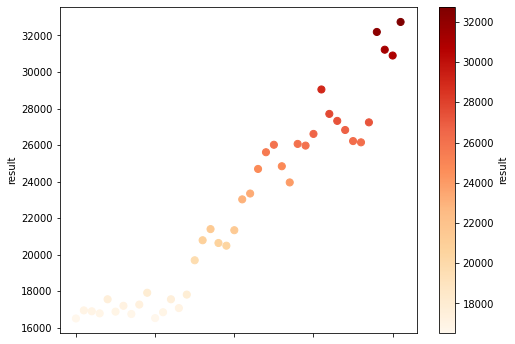

    param1        result
0     60.0  16516.737143
10    70.0  16538.152241
7     67.0  16761.418714
3     63.0  16795.977968
11    71.0  16857.980682
5     65.0  16890.435222
2     62.0  16909.776347
1     61.0  16959.654176
13    73.0  17085.582513
6     66.0  17210.455535
8     68.0  17277.421071
12    72.0  17567.172033
4     64.0  17567.416546
14    74.0  17823.457715
9     69.0  17923.728632
15    75.0  19701.313380
19    79.0  20498.309244
18    78.0  20645.711711
16    76.0  20796.685475
20    80.0  21345.878780
17    77.0  21406.100441
21    81.0  23032.555710
22    82.0  23352.475103
27    87.0  23959.295090
23    83.0  24696.874925
26    86.0  24844.787279
24    84.0  25611.744797
29    89.0  25973.773559
25    85.0  26019.246808
28    88.0  26066.314957
36    96.0  26152.807359
35    95.0  26222.015944
30    90.0  26613.005125
34    94.0  26827.749896
37    97.0  27246.132681
33    93.0  27325.252502
32    92.0  27708.029237
31    91.0  29044.682976
40   100.0  30901.628734


In [4]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[:]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['close']>row['EMA90'] and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1:
        return True
  else:
        return False

loopI = [60, 102, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

count = 0
maxCount = enumI
for i in range(loopI[0], loopI[1], loopI[2]):
  count += 1
  clear_output(wait=True)
  print("Loading...",count,'/',maxCount)
  # -- You can change variables below --
  usdt = 1000
  coin = 0

  stochTop = i / 100

  previousRow = dfTest.iloc[0]

  for index, row in dfTest.iterrows():
    #BUY
    if buyCondition(row, stochTop) and usdt > 0:
      coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
      usdt = 0

    #SELL
    elif sellCondition(row) and coin > 0:
      usdt = coin * row['close'] - (0.0007 * coin * row['close'])
      coin = 0

  myrow = {'param1': i,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
  dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y=1,c='result',s=50,colormap='OrRd',figsize=(8,6))

plt.show()

print(dt.sort_values(by=['result']))

<h1>Supertrend 1 optimizer</h1>

Loading... 600 / 600


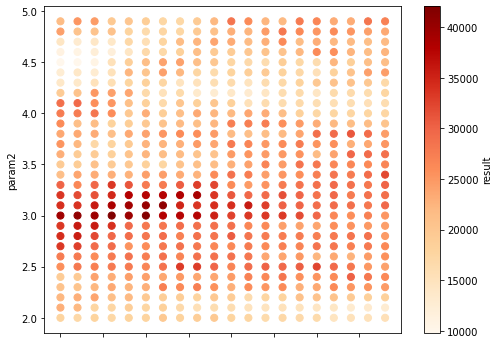

     param1  param2        result
55     11.0     4.5   9818.576296
25     10.0     4.5   9935.551608
56     11.0     4.6  10782.274188
85     12.0     4.5  10797.114238
26     10.0     4.6  11152.987729
..      ...     ...           ...
161    15.0     3.1  40155.521257
40     11.0     3.0  40571.369014
191    16.0     3.1  40775.766540
160    15.0     3.0  41589.937953
100    13.0     3.0  42056.458846

[600 rows x 3 columns]


In [5]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
# Test small date
dfTest = df[:]


# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['close']>row['EMA90'] and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1:
        return True
  else:
        return False

#Supertrend 1 Length
loopI = [10, 30, 1] 
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

#Supertrend 1 Multiplier
loopJ = [20, 50, 1]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

count = 0
maxCount = enumI * enumJ
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    clear_output(wait=True)
    count += 1
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    stochTop = 1.01
    ST_length_1 = i
    ST_multiplier_1 = j / 10
    superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_1, multiplier=ST_multiplier_1)
    dfTest['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]
    dfTest['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row, stochTop) and usdt > 0:
        coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin * row['close'] - (0.0007 * coin * row['close'])
        coin = 0

    myrow = {'param1': ST_length_1, 'param2': ST_multiplier_1, 'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    dt = dt.append(myrow,ignore_index=True)  

dt.plot.scatter(x='param1',y='param2',c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>Supertrend 2 optimizer</h1>

Loading... 280 / 280


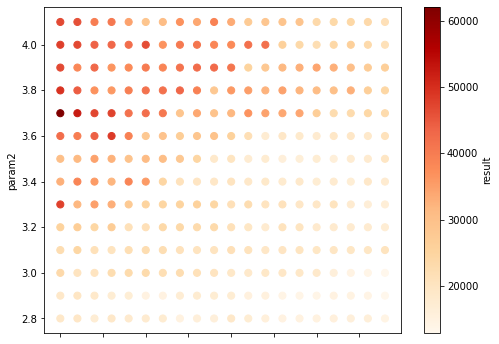

     param1  param2        result
267    29.0     2.9  12888.545779
268    29.0     3.0  12982.628754
254    28.0     3.0  13781.895310
211    25.0     2.9  13787.397863
197    24.0     2.9  13812.005992
..      ...     ...           ...
12     10.0     4.0  48023.406580
50     13.0     3.6  48474.266002
10     10.0     3.8  49471.687374
23     11.0     3.7  52298.476479
9      10.0     3.7  62043.544056

[280 rows x 3 columns]


In [7]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
# Test small date
dfTest = df[:]


# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['close']>row['EMA90'] and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1:
        return True
  else:
        return False

#Supertrend 1 Length
loopI = [10, 30, 1] 
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

#Supertrend 1 Multiplier
loopJ = [28, 42, 1]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

count = 0
maxCount = enumI * enumJ
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    clear_output(wait=True)
    count += 1
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    stochTop = 1.01
    ST_length_1 = 16
    ST_multiplier_1 = 3.0
    
    ST_length_2 = i
    ST_multiplier_2 = j / 10

    superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_1, multiplier=ST_multiplier_1)
    dfTest['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]
    dfTest['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]

    superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_2, multiplier=ST_multiplier_2)
    dfTest['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_2)+"_"+str(ST_multiplier_2)]
    dfTest['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length_2)+"_"+str(ST_multiplier_2)]

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row, stochTop) and usdt > 0:
        coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin * row['close'] - (0.0007 * coin * row['close'])
        coin = 0

    myrow = {'param1': ST_length_2, 'param2': ST_multiplier_2, 'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    dt = dt.append(myrow,ignore_index=True)  

dt.plot.scatter(x='param1',y='param2',c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>Supertrend 3 optimizer</h1>

Loading... 390 / 390


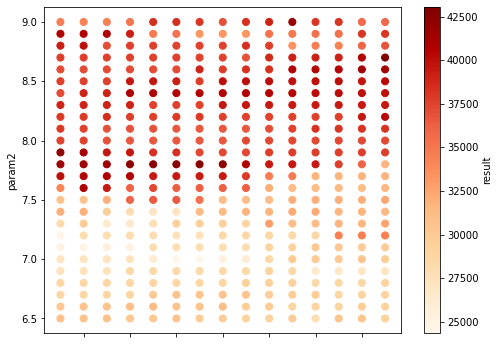

     param1  param2        result
135    40.0     7.0  24333.069349
161    41.0     7.0  24333.069349
7      35.0     7.2  24820.016579
32     36.0     7.1  24868.889749
6      35.0     7.1  25184.415039
..      ...     ...           ...
91     38.0     7.8  42496.150691
169    41.0     7.8  42496.150691
195    42.0     7.8  42496.150691
117    39.0     7.8  42496.150691
386    49.0     8.7  43048.250388

[390 rows x 3 columns]


In [9]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
# Test small date
dfTest = df[:]


# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['close']>row['EMA90'] and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1:
        return True
  else:
        return False

#Supertrend 1 Length
loopI = [35, 50, 1] 
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

#Supertrend 1 Multiplier
loopJ = [65, 91, 1]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

count = 0
maxCount = enumI * enumJ
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    clear_output(wait=True)
    count += 1
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    stochTop = 1.01
    ST_length_1 = 16
    ST_multiplier_1 = 3.0
    
    ST_length_2 = 16
    ST_multiplier_2 = 4.0

    ST_length_3 = i
    ST_multiplier_3 = j / 10

    superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_1, multiplier=ST_multiplier_1)
    dfTest['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]
    dfTest['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length_1)+"_"+str(ST_multiplier_1)]

    superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_2, multiplier=ST_multiplier_2)
    dfTest['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_2)+"_"+str(ST_multiplier_2)]
    dfTest['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length_2)+"_"+str(ST_multiplier_2)]

    superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length_3, multiplier=ST_multiplier_3)
    dfTest['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length_3)+"_"+str(ST_multiplier_3)]
    dfTest['SUPER_TREND_DIRECTION3'] = superTrend['SUPERTd_'+str(ST_length_3)+"_"+str(ST_multiplier_3)]

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row, stochTop) and usdt > 0:
        coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin * row['close'] - (0.0007 * coin * row['close'])
        coin = 0

    myrow = {'param1': ST_length_3, 'param2': ST_multiplier_3, 'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    dt = dt.append(myrow,ignore_index=True)  

dt.plot.scatter(x='param1',y='param2',c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>EMA optimizer</h1>

Loading... 171 / 171


/home/eliott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


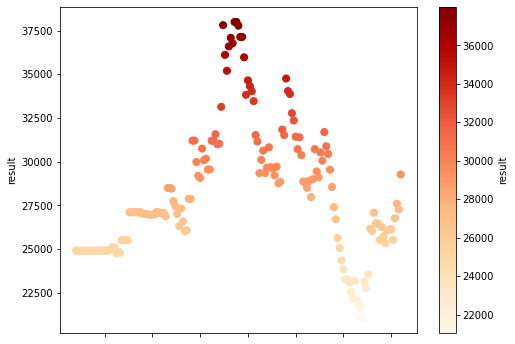

     param1        result
150   160.0  21040.827544
149   159.0  21665.071129
148   158.0  21884.999343
147   157.0  22094.265243
145   155.0  22198.618892
..      ...           ...
87     97.0  37134.890674
85     95.0  37780.017752
77     87.0  37809.559976
83     93.0  37990.733503
84     94.0  37990.733503

[171 rows x 2 columns]


In [11]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[:]

# -- Condition to BUY market --
def buyCondition(row, stochOverBought):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['close']>row['EMA'] and row['STOCH_RSI'] < stochOverBought:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1:
        return True
  else:
        return False

loopI = [10, 181, 1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

count = 0
maxCount = enumI
for i in range(loopI[0], loopI[1], loopI[2]):
  count += 1
  clear_output(wait=True)
  print("Loading...",count,'/',maxCount)
  # -- You can change variables below --
  usdt = 1000
  coin = 0

  stochTop = 1.01
  dfTest['EMA'] = ta.trend.ema_indicator(df['close'], i)

  previousRow = dfTest.iloc[0]

  for index, row in dfTest.iterrows():
    #BUY
    if buyCondition(row, stochTop) and usdt > 0:
      coin = (usdt/row['close']) - 0.0007 * (usdt/row['close'])
      usdt = 0

    #SELL
    elif sellCondition(row) and coin > 0:
      usdt = coin * row['close'] - (0.0007 * coin * row['close'])
      coin = 0

  myrow = {'param1': i,'result': coin * dfTest.iloc[len(dfTest)-1]['close'] + usdt}
  dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y=1,c='result',s=50,colormap='OrRd',figsize=(8,6))

plt.show()

print(dt.sort_values(by=['result']))